In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [42]:
data = pd.read_csv('Advertising.zip')
print(data.shape)
data.head(2)

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [43]:
data.isna().sum()
# Пропусков нет

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [44]:
X = np.array(data.drop(['Unnamed: 0', 'sales'], axis=1))
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [45]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [46]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

  Веса в модели линейной регрессии:
 [ 41.56217205 110.13144155  73.52860638  -0.55006384]


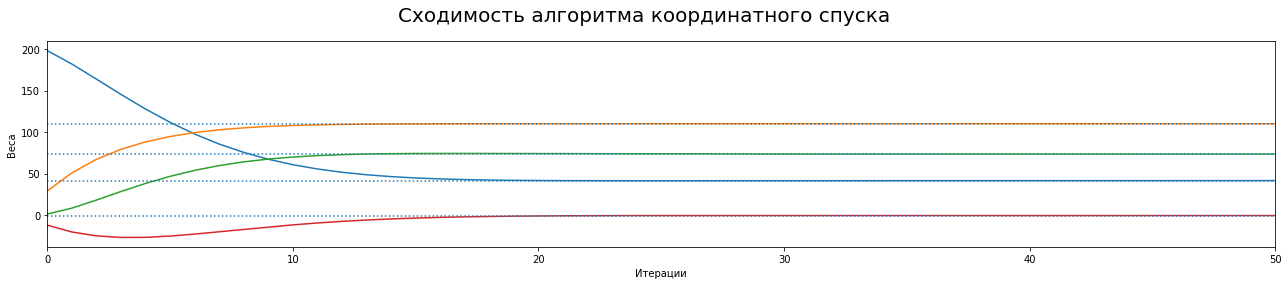

In [47]:
# создаем нулевой вектор весов размерность равной количеству признаков
w = np.zeros(X.shape[1])
w_for_viz = np.zeros((1000,len(w))) # массив весов для визуализации

r = y  # начальное условие 
for i in range(1000):  # 1000 итераций по заданию
    for j in range(len(w)): # перебор координат
        r = r + X[:,j]*w[j]
        w[j] = X[:,j]@r
        r = r - X[:,j]*w[j]
    w_for_viz[i] = w
print(f'  Веса в модели линейной регрессии:\n {w}')

# ВИЗУАЛИЗАЦИЯ
fig, axx = plt.subplots(figsize=(18, 4))
plt.suptitle('Сходимость алгоритма координатного спуска', fontsize=20)
plt.plot(w_for_viz)
axx.set_xlim(0,50)
axx.hlines( w_for_viz[999], 0, 999, linestyles='dotted')
plt.xlabel('Итерации')
plt.ylabel('Веса')
plt.tight_layout()
plt.show();

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [48]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(f'  Веса в модели линейной регрессии:\n {model.coef_}')

  Веса в модели линейной регрессии:
 [ 41.56217205 110.13144155  73.52860638  -0.55006384]


### Результаты совпали.

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [49]:
X = np.array(data.drop(['Unnamed: 0', 'sales'], axis=1))
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

**Добавим единичный столбец**

In [50]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [51]:
def mse_error(y_true, y_pred):
    """Функция для вычисления среднеквадратичной ошибки. 
    Аргументы:
                y_true -  реальные значения,
                y_pred -  предсказываемые значения.
    Возвращает:
                значение среднеквадратичной ошибки.
    """
    return np.sum((y_true - y_pred)**2) / len(y_true)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [52]:
y_pred = np.full(len(y), np.mean(y))
mse_error(y, y_pred)
print(f'Наивный прогноз: mse_error = {mse_error(y, y_pred)}')

Наивный прогноз: mse_error = 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [53]:
def lin_pred(X, w):
    """Функция вычисления вектора прогноза. 
    Аргументы:
                X -  массив предикторов размерностью (M, N),
                w -  вектор весов размерностью N.
    Возвращает:
                вектор прогнозов размерностью M.
    """
    return X@w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [54]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """Функция реализации шага стохастического градиентного спуска. 
    Аргументы:
                X -  массив предикторов размерностью (M, N),
                y - массив целевой переменной размерностью M,
                w -  вектор весов размерностью N,
                train_ind - индекс объекта обучающей выборки, по которому считается изменение весов,
                eta - шаг градиентного спуска.
    Возвращает:
                вектор обновленных весов размерностью N.
    """
    direction = 2*X[train_ind]*(lin_pred(X[train_ind], w) - y[train_ind])
    return w - direction*eta
    

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм следующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [55]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, tol):
    """Функция реализации стохастического градиентного спуска. 
    Аргументы:
                X -  массив предикторов размерностью (M, N),
                y - массив целевой переменной размерностью M,
                w -  вектор весов размерностью N,
                eta - шаг градиентного спуска,
                max_iter - максимальное число итераций,
                tol - евклидово расстояние между векторами весов на соседних 
                итерациях градиентного спуска,при котором алгоритм прекращает работу.
    Возвращает:
                вектор весов размерностью N
                и список ошибок.
    """
    
    dist = np.inf  # расстояние между векторами
    mse_list = []  # список ошибок
    count = 0      # счетчик итераций
        
    while dist>tol and count<max_iter:
        train_ind = np.random.randint(len(y))
        mse_list.append(mse_error(y, lin_pred(X, w)))
        w_i = stoch_grad_step(X, y, w, train_ind, eta)
        dist = np.linalg.norm(w_i - w)
        w = w_i
        count += 1
    return w, mse_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

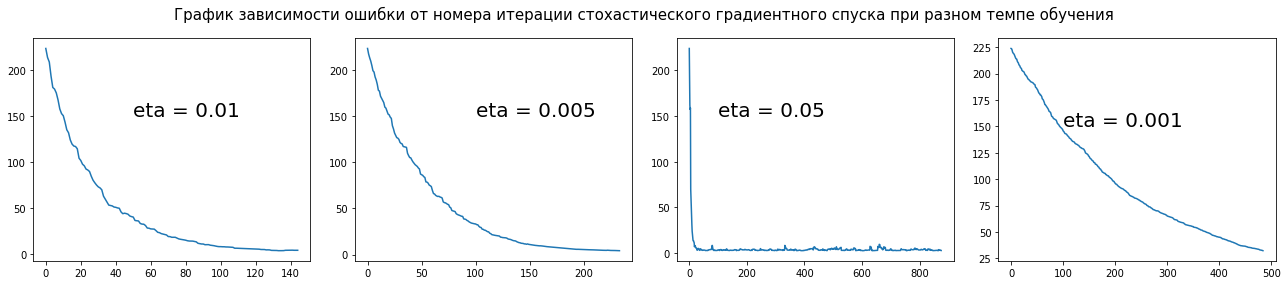

In [56]:
w = np.zeros(X.shape[1]) # начальные веса
eta = 0.01               # темп обучения
max_iter = 1E5           # максимальное кол-во итераций
tol = 1E-3               # критерий остановки (расстояние между векторами)
np.random.seed(42)
w_, mse_list = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)



# ВИЗУАЛИЗАЦИЯ
fig, axx = plt.subplots(1, 4,  figsize=(18, 4))

fig.suptitle('График зависимости ошибки от номера итерации \
стохастического градиентного спуска при разном темпе обучения', fontsize=15)
axx[0].plot(list(range(len(mse_list))), mse_list)
axx[0].annotate(f'eta = {eta}', (50, 150), fontsize=20)


w = np.zeros(X.shape[1])
eta = 0.005               # темп обучения
w_1, mse_list_1 = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)
axx[1].plot(list(range(len(mse_list_1))), mse_list_1)
axx[1].annotate(f'eta = {eta}', (100, 150), fontsize=20)


w = np.zeros(X.shape[1])
eta = 0.05               # темп обучения
w_1, mse_list_1 = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)
axx[2].plot(list(range(len(mse_list_1))), mse_list_1)
axx[2].annotate(f'eta = {eta}', (100, 150), fontsize=20)


w = np.zeros(X.shape[1])
eta = 0.001               # темп обучения
w_1, mse_list_1 = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)
axx[3].plot(list(range(len(mse_list_1))), mse_list_1)
axx[3].annotate(f'eta = {eta}', (100, 150), fontsize=20)

plt.tight_layout()
plt.show();


**Выведите вектор весов, к которому сошелся метод.**

In [57]:
print(w_)

[13.14942188  3.73937733  2.57176943  0.93417699]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [58]:
print(mse_list[-1])
print(f'Прогноз: mse_error = {mse_list[-1]}')

4.37799509672313
Прогноз: mse_error = 4.37799509672313


## Выводы

Без применения библиотек машинного обучения реализованы алгоритмы координатного и стохастического спусков для решения задачи линейной регрессии. Полученные значения параметров линейной регрессии совпадают с вычисленными с помощью специализированных библиотек. Продемонстрирован процесс минимизации функции потерь (MSE) в алгоритме стохастического спуска. Полученное оптимальное значение MSE ~ 4 существенно лучше наивного прогноза MSE ~ 27. Проиллюстрирована зависимость сходимости алгоритма стохастического градиентного спуска от темпа обучения.